### Student Information
Name: Daniel Honies

Student ID: X1120004

GitHub ID: danielhonies

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [52]:
import nltk
nltk.download('punkt')
import pandas as pd
import matplotlib.pyplot as plt
import data_mining_helpers as dmh
import numpy as np
import plotly.graph_objs as go
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielhonies/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
##### PART 1 #####

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


In [54]:
# Exercise 2
X.category_name[:10]
#select all rows where category_name is equal to comp.graphics 
X.loc[X.category_name == 'comp.graphics', :][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics
39,From: g9134255@wampyr.cc.uow.edu.au (Coronado ...,1,comp.graphics
42,From: gwang@magnus.acs.ohio-state.edu (Ge Wang...,1,comp.graphics


In [55]:
# Exercise 5

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

# isnull() doesn't work because the data is not formatted correctly. 
# In rows 2,3 and 5 the data is formatted as a string not as a numpy NaN or None value. 

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [56]:
# Exercise 6
# The dataframe is not ordered by the id column anymore.

X_sample = X.sample(n=1000,random_state=42) #random state

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


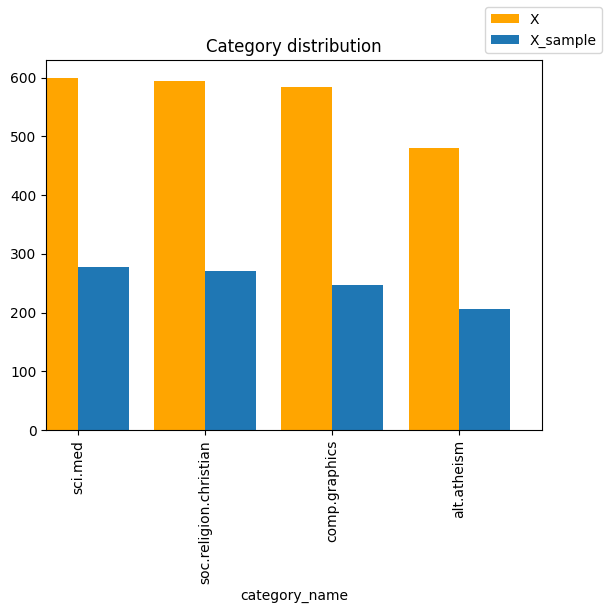

In [57]:
# Exercise 8
# plot comparison bar chart for category_name distribution in X and X_sample
fig, ax = plt.subplots()
X.category_name.value_counts().plot(kind='bar', ax=ax, position=1, color='orange', width=0.4)
X_sample.category_name.value_counts().plot(kind='bar', ax=ax, position=0, width=0.4)
fig.legend(['X', 'X_sample'])
ax.set_title('Category distribution')

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

In [58]:
# Exercise 10
count_vect.get_feature_names_out()[37]

'01'

,the,of,to,and,is,in,that,it,you,for,not,this,be,from,are,edu,have,as,on,with
doc_0,1,1,4,2,2,3,3,1,2,1,4,2,2,2,1,1,1,1,1,5
doc_1,1,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,1,11
doc_2,2,0,0,0,0,0,0,1,0,0,26,0,0,0,0,0,0,0,1,14
doc_3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6
doc_4,1,0,0,0,0,0,0,1,0,0,8,1,0,0,0,0,0,0,1,10
doc_5,1,0,0,1,0,0,0,1,0,0,14,0,0,0,0,0,0,0,1,12
doc_6,2,0,0,0,0,0,0,1,0,0,8,0,0,0,0,0,0,0,1,3
doc_7,4,0,0,0,0,0,0,1,0,0,11,0,0,0,0,0,0,0,1,21
doc_8,1,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,0,0,1,6
doc_9,1,0,0,0,0,0,0,1,0,0,21,0,0,0,1,1,1,0,1,10


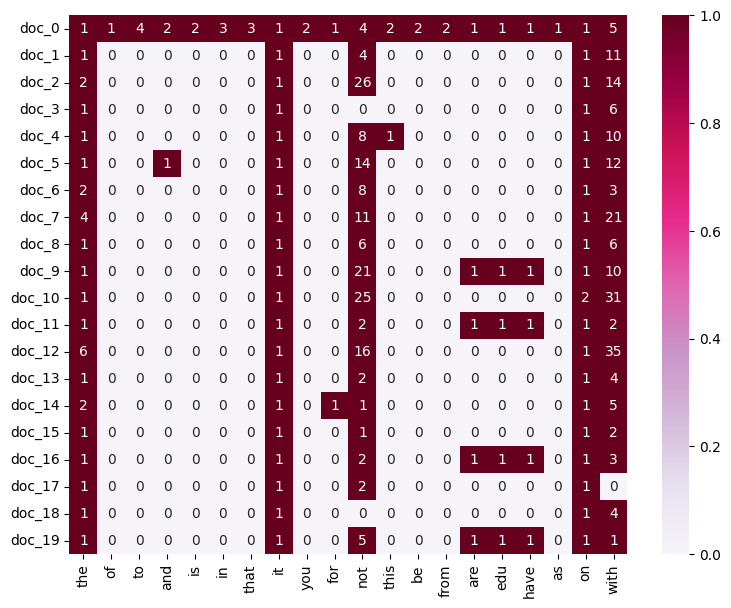

In [59]:
# Exercise 11
# sum word counts over all rows
sum_words = X_counts.sum(axis=0)
#sort sums in descending order
words_freq = [(word, sum_words[0, idx], idx) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
indices = [idx for word, idx in count_vect.vocabulary_.items()]
plot_x = [w[0] for w in words_freq[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20][:, indices[0:20]].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

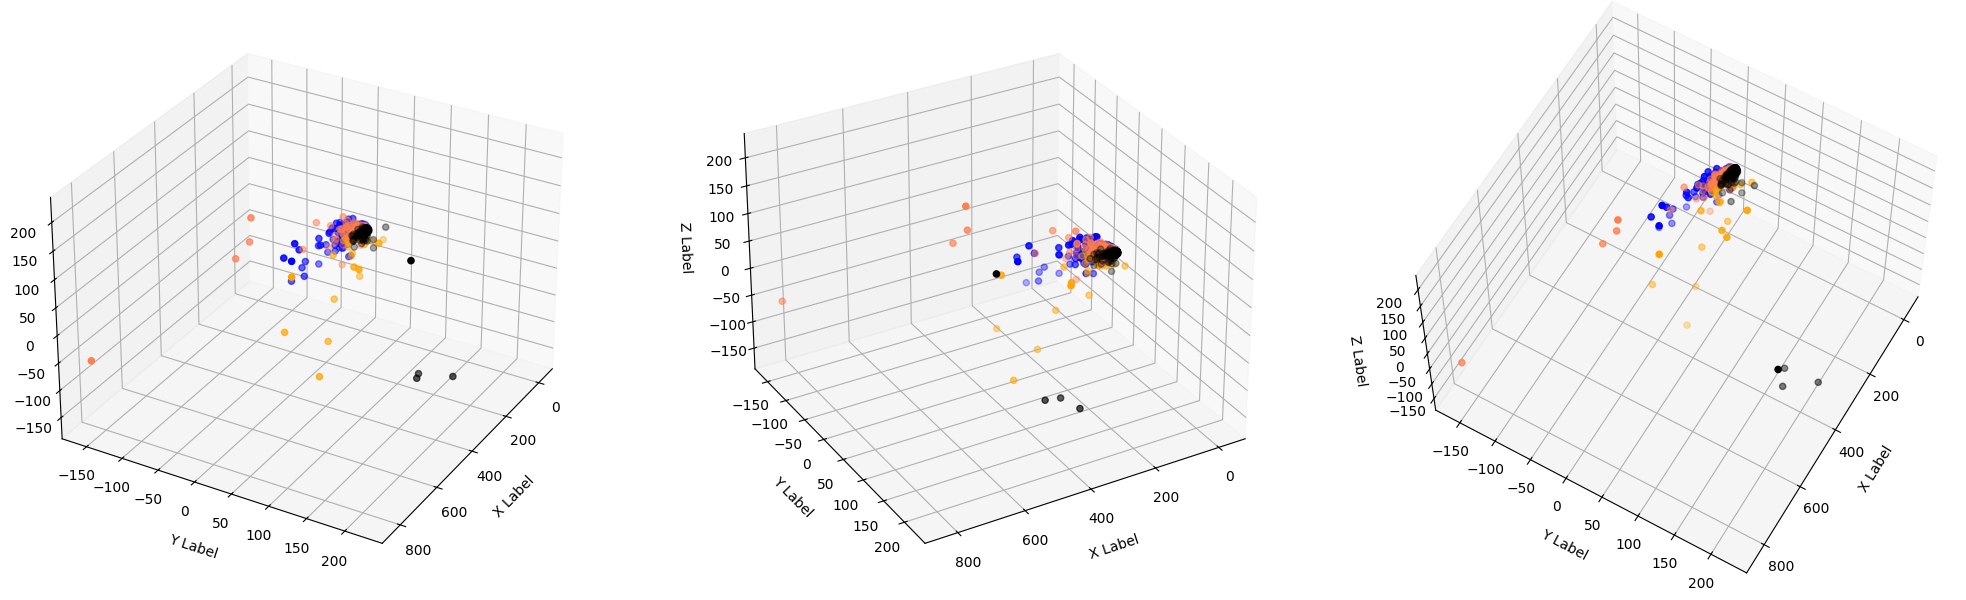

In [60]:
# Exercise 12
col = ['coral', 'blue', 'black', 'orange']
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(figsize=(25, 10))

# Create the first subplot with a viewing angle of (30, 30)
ax1 = fig.add_subplot(131, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c=c, marker='o')
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(30, 30)

# Create the second subplot with a viewing angle of (30, 60)
ax2 = fig.add_subplot(132, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax2.scatter(xs, ys, zs, c=c, marker='o')
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(30, 60)

# Create the third subplot with a viewing angle of (60, 30)
ax3 = fig.add_subplot(133, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax3.scatter(xs, ys, zs, c=c, marker='o')
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(60, 30)

plt.show()

In [61]:
# Exercise 13
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Create a bar chart trace
trace = go.Bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300],
)

layout = go.Layout(
    xaxis=dict(
        tickangle=-90,
        tickfont=dict(size=10),
    ),
    yaxis=dict(
        title='Term Frequency',
    ),
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    ),
    height=500,
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Display the chart
fig.show()

In [62]:
# Exercise 14
# display the top 100 terms by frequency
# get top 100 terms
top_100 = sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)[:100]
# sort alphabetically
top_100 = sorted(top_100, key=lambda x: x[0], reverse=False)


# Create a bar chart trace
trace = go.Bar(
    x=[x[0] for x in top_100],
    y=[x[1] for x in top_100],
)

layout = go.Layout(
    xaxis=dict(
        tickangle=-90,
        tickfont=dict(size=10),
    ),
    yaxis=dict(
        title='Term Frequency',
    ),
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    ),
    height=500,
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Display the chart
fig.show()

In [63]:
# Exercise 15
# display the top 100 terms by frequency
# get top 100 terms
top_100 = sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)[:100]

# Create a bar chart trace
trace = go.Bar(
    x=[x[0] for x in top_100],
    y=[x[1] for x in top_100],
)

layout = go.Layout(
    xaxis=dict(
        tickangle=-90,
        tickfont=dict(size=10),
    ),
    yaxis=dict(
        title='Term Frequency',
    ),
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    ),
    height=500,
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Display the chart
fig.show()

In [64]:
# Exercise 16
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X


,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[0, 0, 1, 0]"


Number of reviews:  3000
Missing values found: 
 sentence    0
score       0
dtype: int64
Duplicates found:  17
                                            sentence  score  \
0  So there is no way for me to plug it in here i...      0   
1                        Good case, Excellent value.      1   
2                             Great for the jawbone.      1   
3  Tied to charger for conversations lasting more...      0   
4                                  The mic is great.      1   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]  
(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	

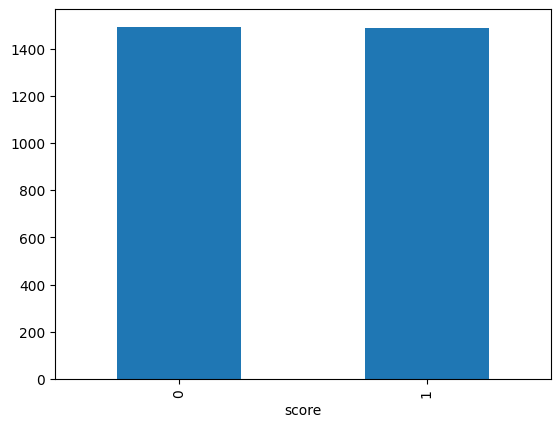

In [65]:
### PART 3 ###

def read_dataset(filename):
    # Read the file into a list of lines
    with open(filename, 'r') as f:
        lines = f.readlines()

    # Split each line into sentence and score
    data = [line.strip().split('\t') for line in lines]

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=['sentence', 'score'])

    # Convert the score column to numeric
    df['score'] = pd.to_numeric(df['score'])

    return df

amazon = read_dataset('amazon_cells_labelled.txt')
imdb = read_dataset('imdb_labelled.txt')
yelp = read_dataset('yelp_labelled.txt')

# Concatenate the DataFrames
df = pd.concat([amazon, imdb, yelp], ignore_index=True)
print("Number of reviews: ", len(df))

# check for missing data
print("Missing values found: \n", df.isnull().sum())
# remove missing data
df.dropna(inplace=True)
# check for duplicates
print("Duplicates found: ", df.duplicated().sum())
# remove duplicates
df.drop_duplicates(inplace=True)

# plot distribution of positive and negative reviews 0 being negative 1 being positive
df['score'].value_counts().plot(kind='bar')

# tokenize the sentences
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
print(df[0:5])

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['sentence'])
print(df_counts.shape)
print(df_counts[0])





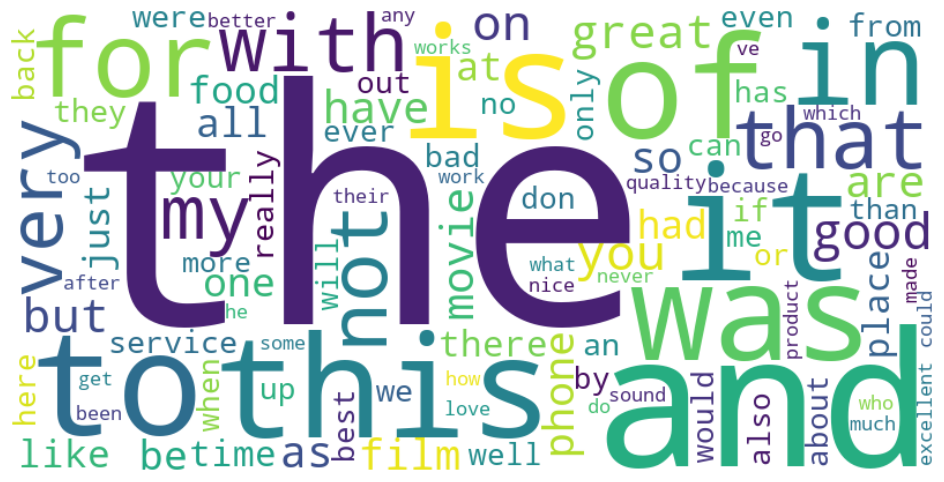

In [66]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_100 = sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)[:100]
# Create a bar chart trace
trace = go.Bar(
    x=[x[0] for x in top_100],
    y=[x[1] for x in top_100],
)

layout = go.Layout(
    xaxis=dict(
        tickangle=-90,
        tickfont=dict(size=10),
    ),
    yaxis=dict(
        title='Term Frequency',
    ),
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    ),
    height=500,
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Display the chart
fig.show()



# Create a scatter plot trace
trace = go.Scatter(
    x=term_frequencies,
    y=df['score'],
    mode='markers',
    text=count_vect.get_feature_names_out(),
    marker=dict(
        size=5,
        color='blue',
        opacity=0.5,
    ),
)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top 100 terms by frequency
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_100 = sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)[:100]

# Create a dictionary of term frequencies
wordcloud_dict = {x[0]: x[1] for x in top_100}

# Create a word cloud from the dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
# TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Fit the vectorizer to the text data
tfidf.fit(df['sentence'])

# Transform the text data into a document matrix with TF-IDF weights
tfidf_matrix = tfidf.transform(df['sentence'])




In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['score'], test_size=0.2, random_state=42)

# Create a CountVectorizer object for word frequency features
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# Create a TfidfVectorizer object for TF-IDF features
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Train a Naive Bayes classifier on the word frequency features
clf_counts = MultinomialNB()
clf_counts.fit(X_train_counts, y_train)
y_pred_counts = clf_counts.predict(X_test_counts)
accuracy_counts = accuracy_score(y_test, y_pred_counts)
print('Accuracy using word frequency features:', accuracy_counts)

# Train a Naive Bayes classifier on the TF-IDF features
clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print('Accuracy using TF-IDF features:', accuracy_tfidf)

# we can observe that the accuracy using TF-IDF features is 
# very slightly higher than the accuracy using word frequency features.

Accuracy using word frequency features: 0.8274706867671692
Accuracy using TF-IDF features: 0.8291457286432161


### Part 4

1. The manual tokenization is not really necessary as we can use the vectorizer straight out of the box. Also adding the tokenization to the data frame uses more memory.

2. The calculation of the term frequencies can be done straight in numpy, the manual way with the for loop is very slow 

